In [1]:
%pip install yfinance
%pip install pandas
%pip install plotly
%pip install vectorbt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import vectorbt as vbt
import pandas as pd

<Axes: xlabel='Date'>

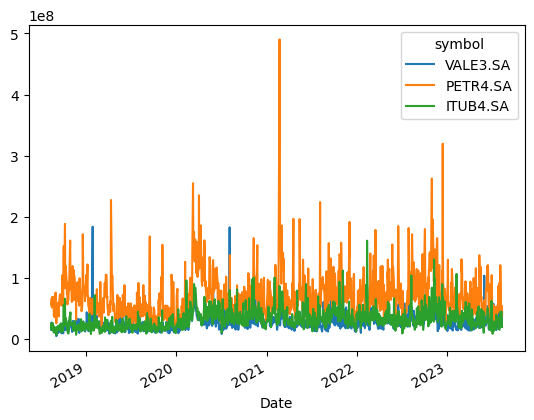

In [6]:
tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA']
df = vbt.YFData.download(tickers, start='5 year ago', interval='1d').get('Volume')
df.plot()

In [10]:
df.vbt.histplot().show()

In [11]:
scale = df.vbt.scale()
scale.head()

symbol,VALE3.SA,PETR4.SA,ITUB4.SA
Date,,,
2018-08-13 03:00:00+00:00,-0.895660,-0.364161,-0.466158
2018-08-14 03:00:00+00:00,-0.688149,-0.449990,-1.037041
2018-08-15 03:00:00+00:00,0.001051,-0.162500,-0.563854
2018-08-16 03:00:00+00:00,-0.488547,-0.559236,-1.090345
2018-08-17 03:00:00+00:00,-0.698122,-0.089010,-0.758751


In [12]:
scale.vbt.histplot().show()

<Axes: xlabel='Date'>

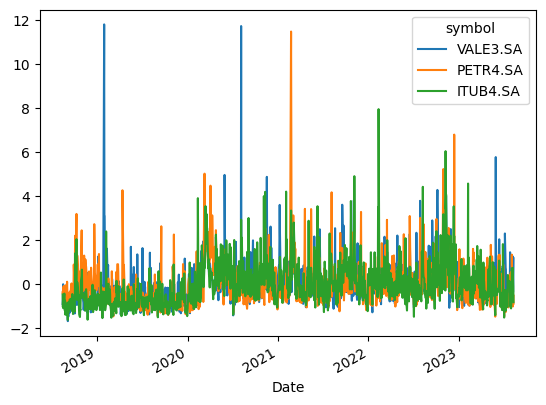

In [13]:
scale.plot()

In [14]:
scale.describe()

symbol,VALE3.SA,PETR4.SA,ITUB4.SA
count,1.240000e+03,1.240000e+03,1.240000e+03
mean,-2.292073e-17,1.719055e-16,-9.168293e-17
std,1.000403e+00,1.000403e+00,1.000403e+00
min,-1.676294e+00,-1.471434e+00,-1.618823e+00
25%,-6.035102e-01,-6.317051e-01,-6.954947e-01
50%,-1.740979e-01,-2.268712e-01,-1.884093e-01
75%,3.796555e-01,4.048494e-01,4.731867e-01
max,1.181968e+01,1.149455e+01,7.965814e+00


<Axes: xlabel='Date'>

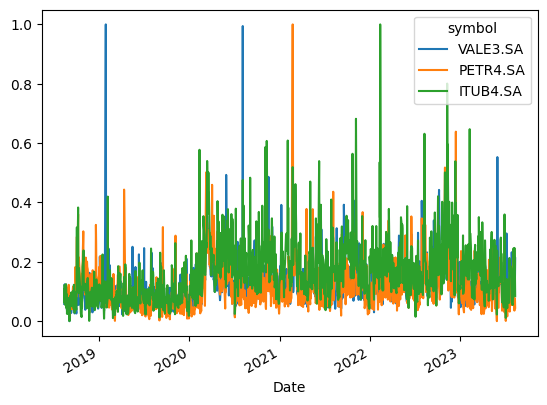

In [19]:
minmax = df.vbt.minmax_scale()
minmax.plot()

In [20]:
minmax.vbt.histplot().show()

In [21]:
milho = yf.download('ZC=F', start='2010-01-01', interval='1d')['Close']
milho

[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    418.50
2010-01-05    418.75
2010-01-06    421.75
2010-01-07    417.50
2010-01-08    423.00
               ...  
2023-08-07    482.25
2023-08-08    485.75
2023-08-09    481.00
2023-08-10    483.25
2023-08-11    487.25
Name: Close, Length: 3421, dtype: float64

<Axes: xlabel='Date'>

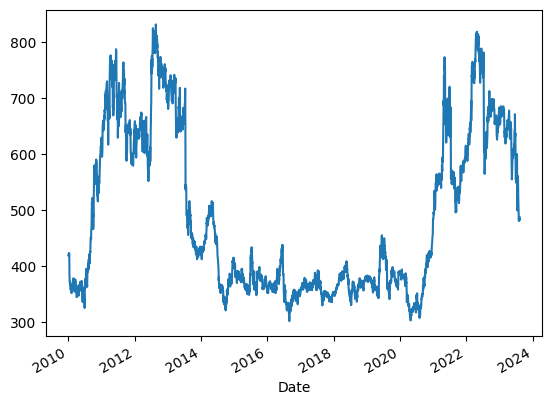

In [22]:
milho.plot()

In [24]:
resultado = milho.pct_change()*100
resultado

Date
2010-01-04         NaN
2010-01-05    0.059737
2010-01-06    0.716418
2010-01-07   -1.007706
2010-01-08    1.317365
                ...   
2023-08-07   -0.413010
2023-08-08    0.725765
2023-08-09   -0.977869
2023-08-10    0.467775
2023-08-11    0.827729
Name: Close, Length: 3421, dtype: float64

In [25]:
resultado.dropna(inplace=True)
resultado

Date
2010-01-05    0.059737
2010-01-06    0.716418
2010-01-07   -1.007706
2010-01-08    1.317365
2010-01-11   -0.118203
                ...   
2023-08-07   -0.413010
2023-08-08    0.725765
2023-08-09   -0.977869
2023-08-10    0.467775
2023-08-11    0.827729
Name: Close, Length: 3420, dtype: float64

<Axes: xlabel='Date'>

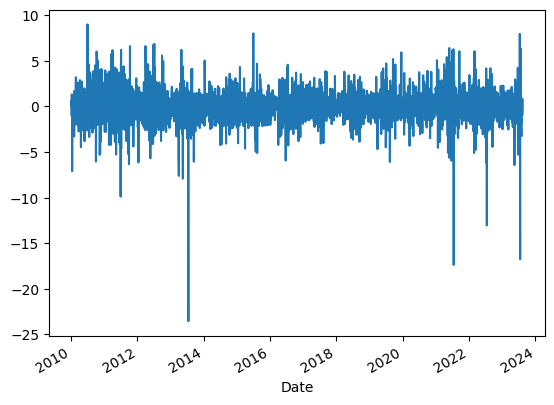

In [26]:
resultado.plot()

In [45]:
bin = resultado.vbt.binarize(threshold=7)
bin

Date
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
2010-01-11    0.0
             ... 
2023-08-07    0.0
2023-08-08    0.0
2023-08-09    0.0
2023-08-10    0.0
2023-08-11    0.0
Name: Close, Length: 3420, dtype: float64

In [46]:
bin_df = pd.DataFrame(bin)
bin_df[bin_df.Close==1]

,Close
Date,
2010-06-30,1.0
2015-06-30,1.0
2023-07-13,1.0
